In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def classify(d,w):
    xw = w * d[['1','feature1','feature2']]
    d['assigned_label'] = xw.sum(axis=1)
    return 

In [3]:
def find_missed(d):
    d.loc[d['assigned_label'] > 0,'assigned_label'] = 1
    d.loc[d['assigned_label'] <= 0,'assigned_label'] = -1
    d['missclass'] = d['label'] != d['assigned_label']
    return len(d.loc[d['missclass']])

In [4]:
def train_perceptron(d):
    eta = 0.001
    w = np.random.randn(3)
    missed = len(d.index)
    p = []
    e = [0]
    while (missed > 0 and e[-1] < 100):
        classify(d,w)
        p.append(find_missed(d))
    
        missclassedxy = d.loc[d['missclass'], ['1','feature1','feature2', 'label']]
        missclassedxy['feature1'] = missclassedxy['feature1'] * missclassedxy['label']
        missclassedxy['feature2'] = missclassedxy['feature2'] * missclassedxy['label']
        missclassedxy['1'] = missclassedxy['1'] * missclassedxy['label']
        missclassedxy.drop(['label'], axis=1,inplace=True)
        
        w += eta*missclassedxy.sum(0)
        e.append(e[-1]+1)
    return w,e,p

In [5]:
def plot_result(d, w):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    correct = d.loc[d['missclass'] == False]
    ax.scatter(correct.loc[correct['label'] == -1,'feature1'],correct.loc[correct['label'] == -1,'feature2'], s=2, c='r')
    ax.scatter(correct.loc[correct['label'] == 1,'feature1'],correct.loc[correct['label'] == 1,'feature2'], s=2, c='y')
    ax.scatter(d.loc[d['missclass'],'feature1'],d.loc[d['missclass'],'feature2'], s=2, c='black')
    ax.plot([(-1*w[0]+6*w[2])/w[1], (-1*w[0]-6*w[2])/w[1]], [-6,6], color='green')
    plt.show()

In [6]:
def measurments(d):
    total = len(d)
    total_missclassed = len(d.loc[d['missclass']])
    misclassed_ratio = total_missclassed/len(d)
    correct_ratio = 1 - misclassed_ratio
    print('total =')
    print(total)
    print('total_missclassed =')
    print(total_missclassed)
    print('misclassed_ratio =')
    print(misclassed_ratio)
    print('correct_ratio =')
    print(correct_ratio)

In [7]:
df_train = pd.read_csv('train.csv')
df_train

,feature1,feature2,label
0,-0.586110,-0.974014,0.0
1,-1.503634,-0.505257,0.0
2,-1.280899,-0.152307,0.0
3,-0.023598,-1.526080,0.0
4,1.336478,-1.159745,1.0
...,...,...,...
3995,0.562388,0.725981,1.0
3996,-1.399836,1.311383,0.0
3997,-0.041693,-1.372289,0.0
3998,0.237685,0.396930,1.0


In [8]:
df_train.loc[df_train['label'] == 0,'label'] = -1
df_train ['1'] = 1

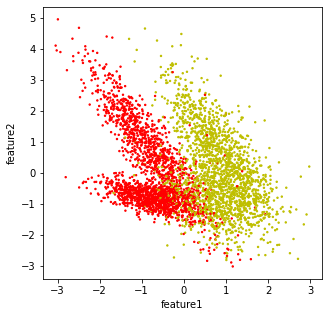

In [9]:
colors = np.where(df_train.label == -1, 'r', 'y')
df_train.plot(kind='scatter', x='feature1', y='feature2', c=colors, s=2, figsize=(5, 5))

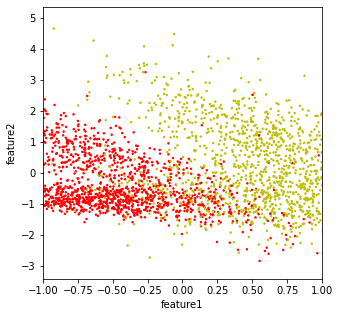

In [10]:
df_train.plot(kind='scatter', x='feature1', y='feature2', c=colors, s=2, xlim=(-1,1), figsize=(5, 5))

In [11]:
weights,e,p = train_perceptron(df_train)
weights

1           0.063877
feature1    0.834247
feature2    0.226945
dtype: float64

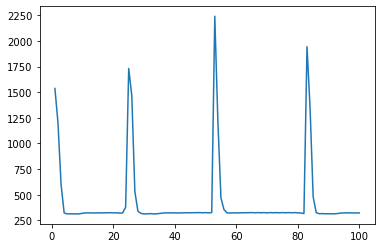

In [12]:
plt.plot(e[1:], p)

total =
4000
total_missclassed =
323
misclassed_ratio =
0.08075
correct_ratio =
0.91925


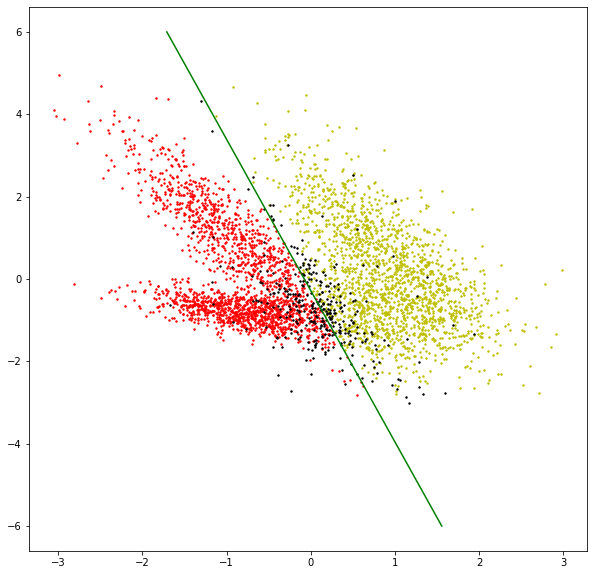

In [13]:
classify(df_train,weights)
measurments(df_train)
plot_result(df_train, weights)

In [14]:
df_test = pd.read_csv('test.csv')
df_test.loc[df_test['label'] == 0,'label'] = -1
df_test ['1'] = 1

total =
1000
total_missclassed =
74
misclassed_ratio =
0.074
correct_ratio =
0.926


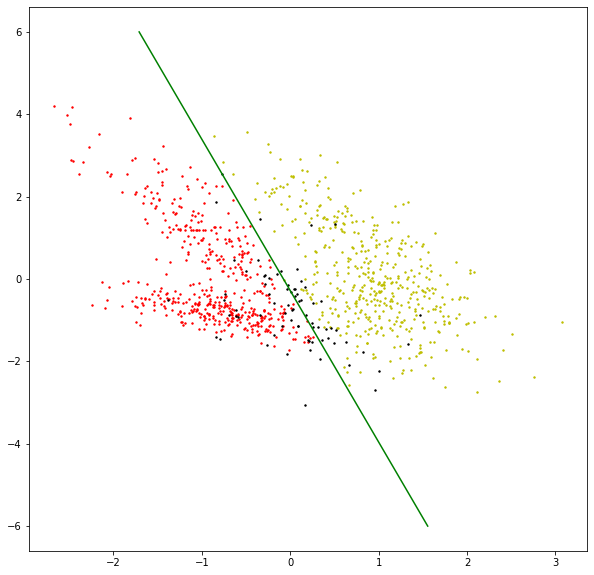

In [15]:
classify(df_test,weights)
find_missed(df_test)
measurments(df_test)
plot_result(df_test, weights)